Open Dataset

In [1]:
import pandas as pd

threatList = pd.read_csv('Dataset\\finalDataset-002.csv')
threatList.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.12-192.168.10.50-35396-22-6,192.168.10.12,35396.0,192.168.10.50,22.0,6.0,7/7/2017 1:00,1266342.0,41.0,44.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.16-192.168.10.50-60058-22-6,192.168.10.16,60058.0,192.168.10.50,22.0,6.0,7/7/2017 1:00,1319353.0,41.0,44.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.12-192.168.10.50-35396-22-6,192.168.10.12,35396.0,192.168.10.50,22.0,6.0,7/7/2017 1:00,160.0,1.0,1.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.12-192.168.10.50-35398-22-6,192.168.10.12,35398.0,192.168.10.50,22.0,6.0,7/7/2017 1:00,1303488.0,41.0,42.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.12-192.168.10.50-35396-22-6,192.168.10.50,22.0,192.168.10.12,35396.0,6.0,7/7/2017 1:00,77.0,1.0,2.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [2]:
threatList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429836 entries, 0 to 429835
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       429836 non-null  object 
 1    Source IP                    429836 non-null  object 
 2    Source Port                  429836 non-null  float64
 3    Destination IP               429836 non-null  object 
 4    Destination Port             429836 non-null  float64
 5    Protocol                     429836 non-null  float64
 6    Timestamp                    429836 non-null  object 
 7    Flow Duration                429836 non-null  float64
 8    Total Fwd Packets            429836 non-null  float64
 9    Total Backward Packets       429836 non-null  float64
 10  Total Length of Fwd Packets   429836 non-null  float64
 11   Total Length of Bwd Packets  429836 non-null  float64
 12   Fwd Packet Length Max        429836 non-nul

Delete some Untrainable column

In [3]:
dropable_column = [
    'Flow ID',
    ' Source IP',
    ' Source Port',
    ' Destination IP',
    ' Timestamp'
]

threatList = threatList.drop(dropable_column, axis=1)
threatList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429836 entries, 0 to 429835
Data columns (total 80 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             429836 non-null  float64
 1    Protocol                     429836 non-null  float64
 2    Flow Duration                429836 non-null  float64
 3    Total Fwd Packets            429836 non-null  float64
 4    Total Backward Packets       429836 non-null  float64
 5   Total Length of Fwd Packets   429836 non-null  float64
 6    Total Length of Bwd Packets  429836 non-null  float64
 7    Fwd Packet Length Max        429836 non-null  float64
 8    Fwd Packet Length Min        429836 non-null  float64
 9    Fwd Packet Length Mean       429836 non-null  float64
 10   Fwd Packet Length Std        429836 non-null  float64
 11  Bwd Packet Length Max         429836 non-null  float64
 12   Bwd Packet Length Min        429836 non-nul

Check for missing value

In [4]:
import numpy as np

NaN = False
for col in threatList.columns:
    count_NaN = threatList[col].isnull().sum()
    if count_NaN > 0:
        NaN = True
        print(f"Column '{col}' has {count_NaN} NaN values.")
        


Column 'Flow Bytes/s' has 15 NaN values.


In [5]:
threatList['Flow Bytes/s'].head()

0    7595.104640
1    7289.936810
2       0.000000
3    7182.267884
4       0.000000
Name: Flow Bytes/s, dtype: float64

In [6]:
threatList = threatList.dropna()
print('NaN value : ', threatList.isnull().sum().sum())

NaN value :  0


Check for negative value

In [7]:
column = threatList.select_dtypes(include=np.number).columns

min_column = [col for col in column if(threatList[col] < 0).any()]

if len(min_column) > 0:
    for col in min_column:
        min_sum = (threatList[col] < 0).sum()
        print(f'Negative value in column {col} : {min_sum}')


Negative value in column  Flow Duration : 36
Negative value in column Flow Bytes/s : 36
Negative value in column  Flow Packets/s : 36
Negative value in column  Flow IAT Mean : 36
Negative value in column  Flow IAT Max : 36
Negative value in column  Flow IAT Min : 201
Negative value in column  Fwd IAT Min : 6
Negative value in column Init_Win_bytes_forward : 60210
Negative value in column  Init_Win_bytes_backward : 124970


In [8]:
winBytes = ['Init_Win_bytes_forward', ' Init_Win_bytes_backward']
for col in winBytes:
    threatList.loc[threatList[col] < 0, col] = -1
    print(f"Negative values in column '{col}' have been replaced with -1.")

Negative values in column 'Init_Win_bytes_forward' have been replaced with -1.
Negative values in column ' Init_Win_bytes_backward' have been replaced with -1.


In [9]:
num_columns = threatList.select_dtypes(include=np.number).columns
cols_to_rowDrop = []
for col in num_columns:
    if col not in winBytes:
        negative_count = (threatList[col] < 0).sum()
        if negative_count > 0:
            cols_to_rowDrop.append(col)

if len (cols_to_rowDrop) > 0:
    for col in cols_to_rowDrop:
        threatList = threatList[threatList[col] >= 0]

In [10]:
column = threatList.select_dtypes(include=np.number).columns

min_column = [col for col in column if(threatList[col] < 0).any()]

if len(min_column) > 0:
    for col in min_column:
        min_sum = (threatList[col] < 0).sum()
        print(f'Negative value in column {col} : {min_sum}')

else:
    print('No negative value found in any column.')

Negative value in column Init_Win_bytes_forward : 60208
Negative value in column  Init_Win_bytes_backward : 124968


Check for invinite value

In [11]:
cols = threatList.select_dtypes(include=[np.number]).columns
inf_columns = [col for col in cols if np.isinf(threatList[col]).any()]

if len(inf_columns) > 0:
    for col in inf_columns:
        inf_count = np.isinf(threatList[col]).sum()
        print(f"Column '{col}' has {inf_count} infinite values.")

Column 'Flow Bytes/s' has 361 infinite values.
Column ' Flow Packets/s' has 361 infinite values.


In [12]:
threatList.replace([np.inf, -np.inf], np.nan, inplace=True)
threatList = threatList.dropna()

if len(inf_columns) > 0:
    for col in inf_columns:
        inf_count = np.isinf(threatList[col]).sum()
        print(f"Column '{col}' has {inf_count} infinite values.")

Column 'Flow Bytes/s' has 0 infinite values.
Column ' Flow Packets/s' has 0 infinite values.


Delete duplicate data

In [13]:
print("Row total before drop duplicates : ", len(threatList))

Row total before drop duplicates :  429259


In [14]:
threatList.drop_duplicates(inplace=True)
print("Row total after drop duplicates : ", len(threatList))

diffrent = 429259 - len(threatList)
print("Total row droped : ", diffrent)

Row total after drop duplicates :  352211
Total row droped :  77048


Split Dataset

In [15]:
from sklearn.model_selection import train_test_split

target = [' Label']
x = threatList.drop(columns=target)
y = threatList[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((281768, 79), (281768, 1), (70443, 79), (70443, 1))

Check data distribution

In [16]:
y_train[' Label'].value_counts()

 Label
DDoS           102268
BENIGN          98247
PortScan        72713
Brute Force      8540
Name: count, dtype: int64

Index Order :  Axes(0.125,0.11;0.775x0.77)


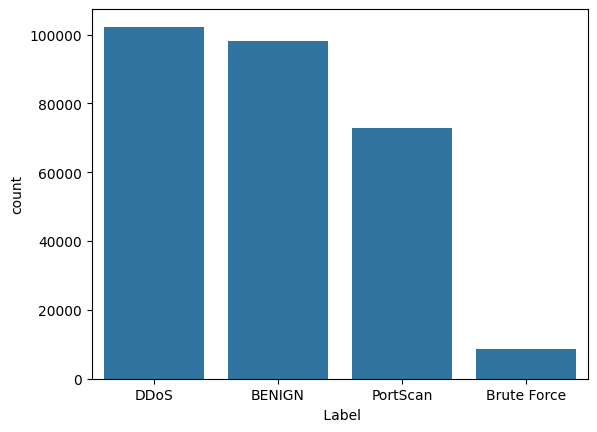

In [17]:
import seaborn as sb

index_order = y_train[' Label'].value_counts().index
ax = sb.countplot(x=y_train[' Label'], order=index_order)
print("Index Order : ", ax)

Using SMOTE to balance the data

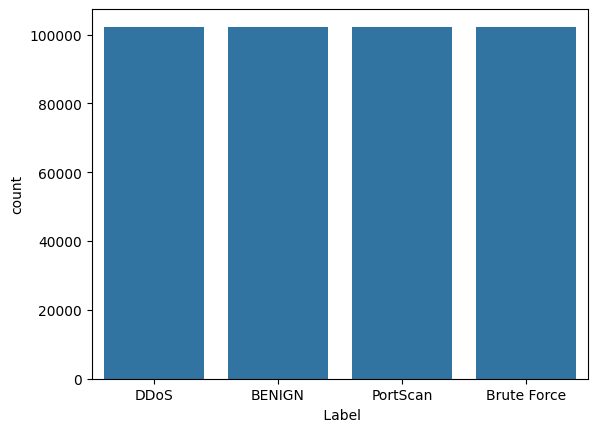

In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='not majority')

x_train_res, y_train_res = smote.fit_resample(x_train, y_train)
ax = sb.countplot(x=y_train_res[' Label'], order=index_order)

In [19]:
y_train_res[' Label'].value_counts()

 Label
Brute Force    102268
DDoS           102268
PortScan       102268
BENIGN         102268
Name: count, dtype: int64

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time

print("Begine Training")
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(x_train_res, y_train_res.values.ravel())
print("Training Completed")

y_pred = rf.predict(x_test)
print("Classification Report : \n", classification_report(y_test, y_pred, digits=5))
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("Accuracy Score : ", accuracy_score(y_test, y_pred))



Begine Training
Training Completed
Classification Report : 
               precision    recall  f1-score   support

      BENIGN    0.99899   0.99862   0.99880     24661
 Brute Force    0.98430   0.99759   0.99090      2074
        DDoS    0.99992   0.99926   0.99959     25727
    PortScan    1.00000   0.99989   0.99994     17981

    accuracy                        0.99915     70443
   macro avg    0.99580   0.99884   0.99731     70443
weighted avg    0.99915   0.99915   0.99915     70443

Confusion Matrix : 
 [[24627    32     2     0]
 [    5  2069     0     0]
 [   19     0 25708     0]
 [    1     1     0 17979]]
Accuracy Score :  0.9991482475192709


In [21]:

train_score = rf.score(x_train_res, y_train_res)
test_score = rf.score(x_test, y_test)

print(f"Skor Training: {train_score * 100:.2f}%")
print(f"Skor Testing : {test_score * 100:.2f}%")

Skor Training: 99.94%
Skor Testing : 99.91%


In [22]:
leakChecker = pd.merge(x_train_res, x_test, how='inner', indicator=True)
print("Leak Checker : ", len(leakChecker))

Leak Checker :  0


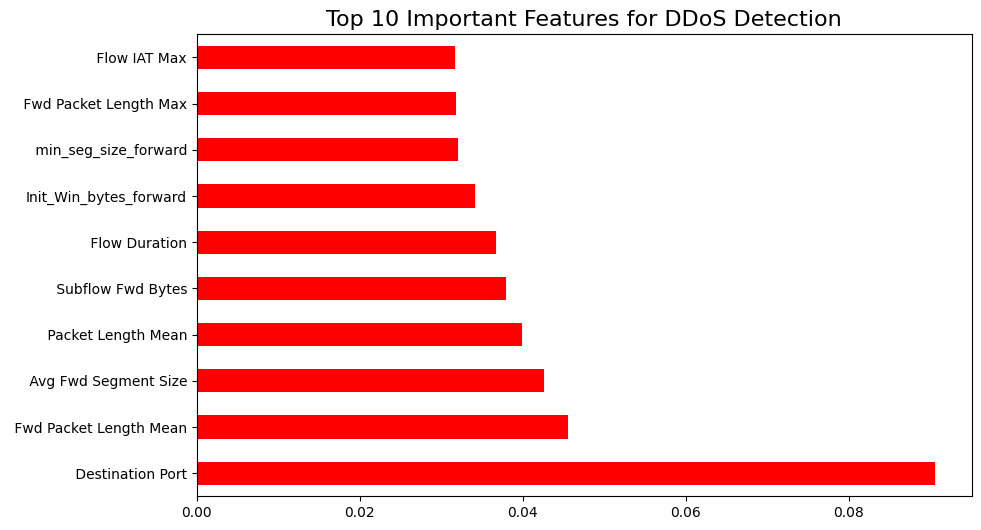

In [23]:
from matplotlib import pyplot as plt

impt_features = pd.Series(rf.feature_importances_, index=x_train_res.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
impt_features.nlargest(10).plot(kind='barh', color='red')
plt.title('Top 10 Important Features for DDoS Detection', fontsize=16)
plt.show()